# Problem Statement
##### The data set contains images of hand-written digits: 10 classes where each class refers to a digit(0 to 9). Objective of our model is to predict the correct digit from 0 to 9, based on given handwritten image of digit

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

# Loading Dataset : 
###### Load predefined dataset from Sklearn.datasets

In [2]:
digits_df=datasets.load_digits()
print('Digits dataset structure',dir(digits_df))
print('Data Shape= ',digits_df.data.shape)
print('Pixel representation of data',digits_df.data)

Digits dataset structure ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Data Shape=  (1797, 64)
Pixel representation of data [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
digits_df.data.shape

(1797, 64)

In [4]:
digits_df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits_df.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits_df.target[:1]

array([0])

In [7]:
digits_df.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits_df.images.shape

(1797, 8, 8)

In [9]:
digits_df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Data Understanding

In [10]:
digits_df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

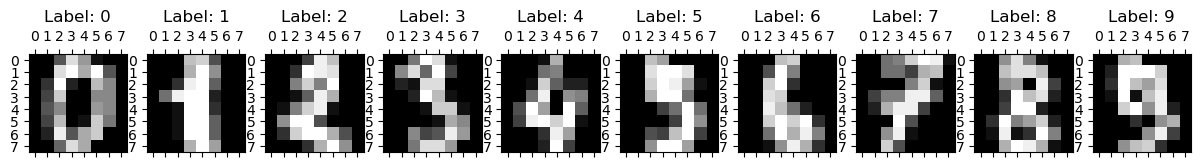

In [11]:
rows=1
columns=10
fig,ax=plt.subplots(rows,columns,figsize=(15,16))

plt.gray()
for i in range(columns):
    ax[i].matshow(digits_df.images[i])
    ax[i].set_title(f"Label: {digits_df.target_names[i]}")

## Building Machine Learning Model

In [12]:
x=digits_df.data
y=digits_df.target

### Create Test and Train Dataset


In [13]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

In [14]:
x_train.shape

(1437, 64)

In [15]:
x_test.shape

(360, 64)

In [16]:
y_train.shape

(1437,)

In [17]:
y_test.shape

(360,)

# Multiclass Logistic Regression Using OVR

In [18]:
logR=linear_model.LogisticRegression(multi_class="ovr")

In [19]:
logR.fit(x_train,y_train)

C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

# Testing the model

In [20]:
x_test[120]

array([ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6.,
       15.,  9.,  0.,  0.,  0.,  0.,  6., 15., 12.,  0.,  0.,  0.,  0.,
        3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,
        0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6.,
       16.,  2.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.])

In [23]:
print(logR.predict([x_test[120]]))

[3]


6


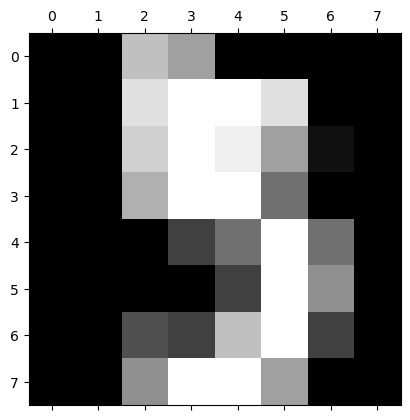

In [27]:
print(y_test[120])
plt.matshow(digits_df.images[5])
plt.show()

In [26]:
logR.score(x_test,y_test)

0.9666666666666667

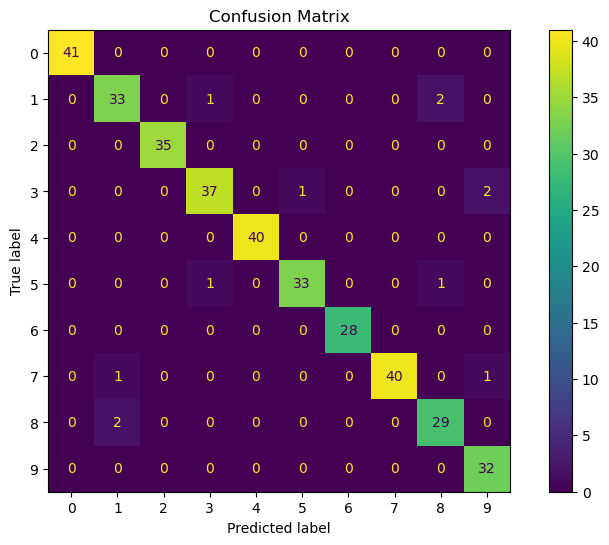

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

# Generate the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(logR, x_test, y_test, display_labels=digits_df.target_names, ax=ax)

# If you need the confusion matrix values, you can access them using:
confusion_matrix = disp.confusion_matrix


In [36]:
print(metrics.classification_report(y_test,logR.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.92      0.92      0.92        36
           2       1.00      1.00      1.00        35
           3       0.95      0.93      0.94        40
           4       1.00      1.00      1.00        40
           5       0.97      0.94      0.96        35
           6       1.00      1.00      1.00        28
           7       1.00      0.95      0.98        42
           8       0.91      0.94      0.92        31
           9       0.91      1.00      0.96        32

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [38]:
import pickle as pik

In [39]:
pik.dump(logR,open('logisticreg.sav',mode='wb'))